In [24]:
import numpy as np
import pandas as pd
%matplotlib notebook

In [25]:
# The statistical module used to run chi square test
import scipy.stats as stats
import matplotlib.pyplot as plt
import requests
import json
import gmaps
import requests
import time
from us import states
from config import gkey
from geopy import geocoders

In [26]:
# Observed data from the 2015 US Census by County
df = pd.read_csv("Resources/2015censuscounty.csv")

#Examining the individual columns provided by the data
for col in df.columns: 
    print(col) 

CensusId
State
County
TotalPop
Men
Women
Hispanic
White
Black
Native
Asian
Pacific
Citizen
Income
IncomeErr
IncomePerCap
IncomePerCapErr
Poverty
ChildPoverty
Professional
Service
Office
Construction
Production
Drive
Carpool
Transit
Walk
OtherTransp
WorkAtHome
MeanCommute
Employed
PrivateWork
PublicWork
SelfEmployed
FamilyWork
Unemployment


In [27]:
#dropping columns to show only relevant data
df_clean = pd.read_csv("Resources/2015censuscounty.csv")
df_clean.drop(df_clean.iloc[:, 3:36], inplace = True, axis = 1) 

df_clean.head()


,CensusId,State,County,Unemployment
0,1001,Alabama,Autauga,7.6
1,1003,Alabama,Baldwin,7.5
2,1005,Alabama,Barbour,17.6
3,1007,Alabama,Bibb,8.3
4,1009,Alabama,Blount,7.7


In [10]:
latitude = []
longtitude = []

#performing API requests for the geo-coord of each county and appending to data frame
for i in range(len(df_clean)):
    target_city = f"{df.iloc[i, 2]},{df.iloc[i, 1]}"
    target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
                  'address={0}&key={1}').format(target_city, gkey)
    geo_data = requests.get(target_url).json()
    latitude.append(geo_data["results"][0]["geometry"]["location"]["lat"])
    longtitude.append(geo_data["results"][0]["geometry"]["location"]["lng"])


KeyboardInterrupt: 

In [ ]:
df_clean["Latitude"] = latitude
df_clean["Longitude"]= longtitude
df_clean.head()
df_clean.to_csv("LocationDataframe.csv")

In [28]:

clean_df_location = pd.read_csv("LocationDataframe.csv")

clean_df_location.head()

,Unnamed: 0,CensusId,State,County,Unemployment,Latitude,Longitude
0,0,1001,Alabama,Autauga,7.6,32.579182,-86.499655
1,1,1003,Alabama,Baldwin,7.5,30.601074,-87.776333
2,2,1005,Alabama,Barbour,17.6,31.817290,-85.354965
3,3,1007,Alabama,Bibb,8.3,32.956280,-87.142289
4,4,1009,Alabama,Blount,7.7,34.014515,-86.499655


In [29]:
#combining job types for new categories
blue_collar= df["Construction"] + df["Production"]
white_collar = df["Professional"]+ df["Office"]

In [31]:
#converting appropriate data columns into a numeric data type 
locations = clean_df_location[["Latitude", "Longitude"]].astype(float)
unempl_rate = clean_df_location["Unemployment"].astype(float)

#creating heat later based on unemployment rate
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=unempl_rate, 
                                 dissipating=False, max_intensity=80,
                                 point_radius = .7)

fig.add_layer(heat_layer)

fig



Figure(layout=FigureLayout(height='420px'))

In [14]:
fig2 = gmaps.figure()

blue_collar_layer = gmaps.heatmap_layer(locations, weights=blue_collar, 
                                 dissipating=False, max_intensity=150,
                                 point_radius = .5)


fig2.add_layer(blue_collar_layer)

fig2


Figure(layout=FigureLayout(height='420px'))

In [15]:
fig2 = gmaps.figure()

white_collar_layer = gmaps.heatmap_layer(locations, weights=white_collar, 
                                 dissipating=False, max_intensity=200,
                                 point_radius = .5)



fig2.add_layer(white_collar_layer)

fig2

Figure(layout=FigureLayout(height='420px'))

<IPython.core.display.Javascript object>


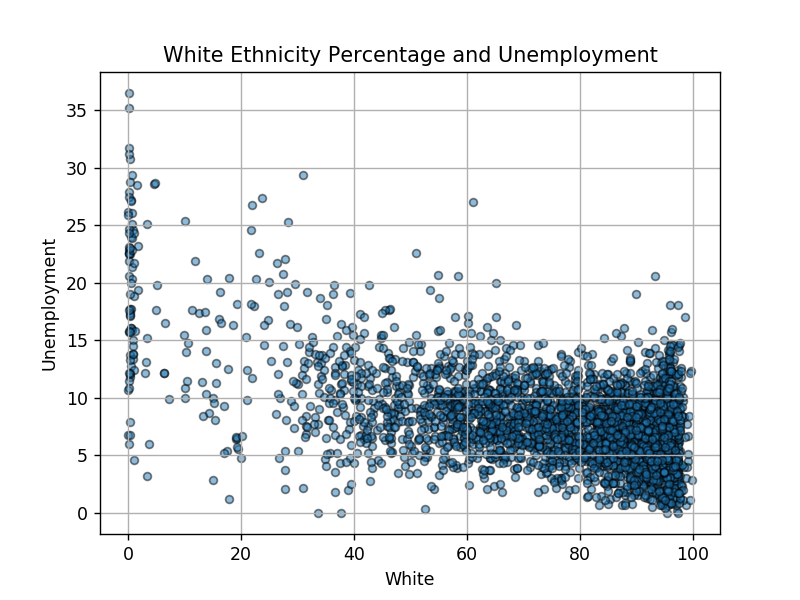

In [16]:
# Calculate the critical value
white_unemp_scatter = df.plot(kind="scatter", x = "White", y = "Unemployment", 
                              grid=True, alpha = 0.5, edgecolors = "black", 
                              title = "White Ethnicity Percentage and Unemployment")

<IPython.core.display.Javascript object>


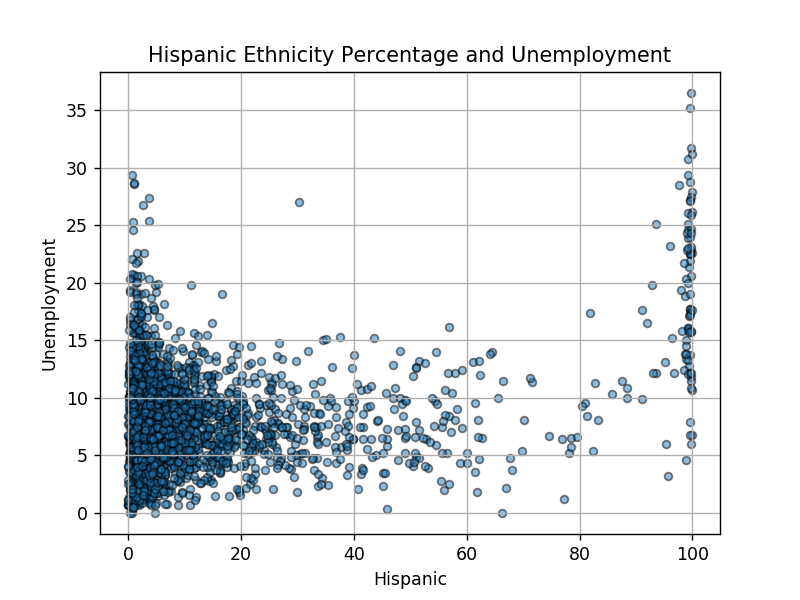

In [65]:
# Print the critical value
hispanic_unemp_scatter = df.plot(kind="scatter", x = "Hispanic", 
                                 y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black",
                                title = "Hispanic Ethnicity Percentage and Unemployment")

<IPython.core.display.Javascript object>


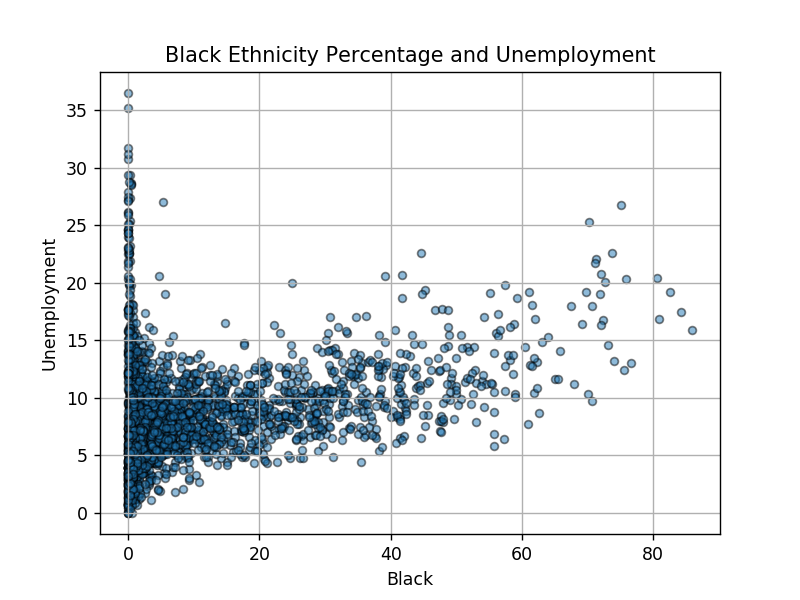

In [66]:
# Run the chi square test with stats.chisquare()
black_unemp_scatter = df.plot(kind="scatter", x = "Black", 
                              y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black",
                             title = "Black Ethnicity Percentage and Unemployment")

<IPython.core.display.Javascript object>


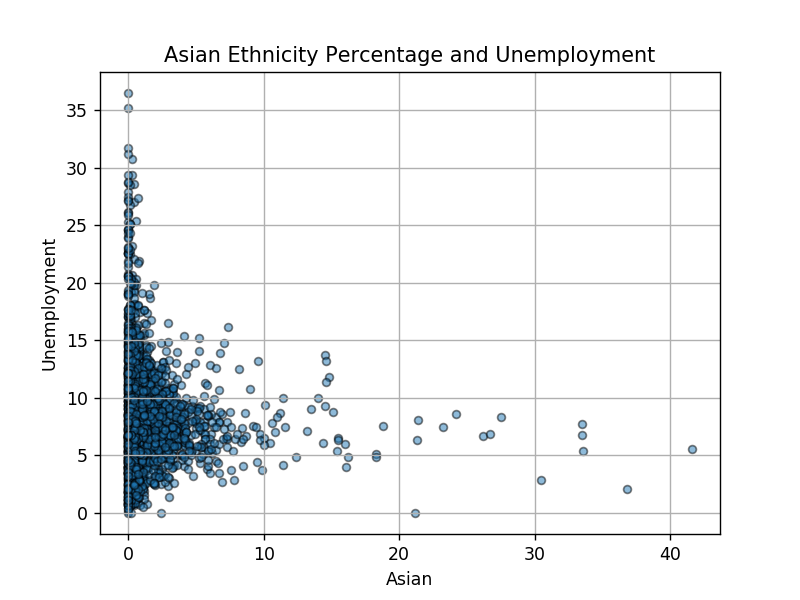

In [67]:
asian_unemp_scatter = df.plot(kind="scatter", x = "Asian", 
                              y = "Unemployment", grid=True, alpha = 0.5, edgecolors = "black",
                             title = "Asian Ethnicity Percentage and Unemployment")

In [17]:
#filtering to counties where black ethnicity percentage is greater than 40%
high_black_perc_df = df[df["Black"]>40]

#dropping all columns so that only the Census ID for the county remains
high_black_perc_df.drop(high_black_perc_df.iloc[:, 1:39], inplace = True, axis = 1) 

#merging with the location data frame created for the unemployment heatmap so that only the filtered towns 
#geocoordinates are retreived
bl_loc_table = pd.merge(high_black_perc_df, clean_df_location, on="CensusId", how="left")

bl_loc_table.head()

C:\Users\yamin\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,CensusId,Unnamed: 0,State,County,Unemployment,Latitude,Longitude
0,1005,2,Alabama,Barbour,17.6,31.817290,-85.354965
1,1011,5,Alabama,Bullock,18.0,32.057354,-85.725637
2,1013,6,Alabama,Butler,10.9,32.089591,-88.221965
3,1017,8,Alabama,Chambers,8.9,32.902805,-85.354965
4,1023,11,Alabama,Choctaw,13.6,32.071663,-88.246118


In [45]:
bl_locations = bl_loc_table[["Latitude", "Longitude"]].astype(float)

bl_county_layer = gmaps.symbol_layer(
    bl_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
)


fig6 = gmaps.figure()
fig6.add_layer(bl_county_layer)
fig6.add_layer(heat_layer)
fig6

Figure(layout=FigureLayout(height='420px'))

In [18]:
high_asian_perc_df = df[df["Asian"]>20]
high_asian_perc_df.drop(high_asian_perc_df.iloc[:, 1:39], inplace = True, axis = 1) 
high_asian_perc_df
as_loc_table = pd.merge(high_asian_perc_df, clean_df_location, on="CensusId", how="left")
as_loc_table.head()

,CensusId,Unnamed: 0,State,County,Unemployment,Latitude,Longitude
0,2013,67,Alaska,Aleutians East Borough,2.9,55.538801,-161.898854
1,2016,68,Alaska,Aleutians West Census Area,2.1,52.323270,-174.159607
2,2150,80,Alaska,Kodiak Island Borough,6.3,57.536934,-153.265935
3,6001,186,California,Alameda,8.3,37.779872,-122.282185
4,6075,223,California,San Francisco,6.8,37.774929,-122.419415


In [19]:
as_locations = as_loc_table[["Latitude", "Longitude"]].astype(float)

as_county_layer = gmaps.symbol_layer(
    as_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
)


fig6 = gmaps.figure()
fig6.add_layer(as_county_layer)
fig6.add_layer(heat_layer)
fig6

Figure(layout=FigureLayout(height='420px'))

In [20]:
high_white_perc_df = df[df["White"]>90]
high_white_perc_df.drop(high_white_perc_df.iloc[:, 1:39], inplace = True, axis = 1) 
high_white_perc_df
merge_table = pd.merge(high_white_perc_df, clean_df_location, on="CensusId", how="left")
merge_table.head()

,CensusId,Unnamed: 0,State,County,Unemployment,Latitude,Longitude
0,1019,9,Alabama,Cherokee,7.9,34.757034,-87.972814
1,1029,14,Alabama,Cleburne,8.3,33.626171,-85.520024
2,1043,21,Alabama,Cullman,7.3,34.174821,-86.843612
3,1093,46,Alabama,Marion,9.9,32.632354,-87.319165
4,1133,66,Alabama,Winston,9.6,34.169009,-87.341360


In [21]:
wh_locations = merge_table[["Latitude", "Longitude"]].astype(float)

wh_layer = gmaps.symbol_layer(
    wh_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
)


fig6 = gmaps.figure()
fig6.add_layer(wh_layer)
fig6.add_layer(heat_layer)
fig6

Figure(layout=FigureLayout(height='420px'))

In [22]:
high_hisp_perc_df = df[df["Hispanic"]>40]
high_hisp_perc_df.drop(high_hisp_perc_df.iloc[:, 1:39], inplace = True, axis = 1) 
high_hisp_perc_df
merge_table_hisp = pd.merge(high_hisp_perc_df, clean_df_location, on="CensusId", how="left")
merge_table_hisp.head()

,CensusId,Unnamed: 0,State,County,Unemployment,Latitude,Longitude
0,4011,101,Arizona,Greenlee,10.0,33.240560,-109.283153
1,4023,108,Arizona,Santa Cruz,11.3,31.598613,-110.807608
2,4027,110,Arizona,Yuma,13.1,32.692651,-114.627692
3,6011,191,California,Colusa,10.4,39.214334,-122.009417
4,6019,195,California,Fresno,13.2,36.737798,-119.787125


In [23]:
hisp_locations = merge_table_hisp[["Latitude", "Longitude"]].astype(float)

hisp_layer = gmaps.symbol_layer(
    hisp_locations, fill_color='rgba(0, 150, 0, 0.4)',
    stroke_color='rgba(0, 0, 150, 0.4)', scale=2,
)


fig7 = gmaps.figure()
fig7.add_layer(hisp_layer)
fig7.add_layer(heat_layer)
fig7

Figure(layout=FigureLayout(height='420px'))